In [1]:
import obspy 
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from obspy.core.utcdatetime import UTCDateTime as UTC
import numpy as np

In [2]:
def obspy_preproc(obs):
    obs.detrend('linear')
    obs.detrend('demean')
    obs.taper(0.01, type="cosine")
    obs.filter("bandpass", freqmin=1.0, freqmax=17.0, corners=4)
    if obs[0].stats.sampling_rate != 100:
        print(f"Resampled from {obs[0].stats.sampling_rate} to 100 Hz...")
        obs.resample(100)
    return obs

In [3]:
st = obspy.read("../../../data/WY.YNR.01.HHZ__20140330T000000Z__20140331T000000Z.mseed")
st = obspy_preproc(st)

In [4]:
proba_file_name = "../../posterior_probs/YNR.probs.h5"
proba_file = h5py.File(proba_file_name, "r")
p_proba = proba_file["p_proba"][:]
s_proba = proba_file["s_proba"][:]
proba_file.close()

In [5]:
auto_df = pd.read_csv("../../compare_catalogs/spdl_catalogs/20221215_autoArrivals.csv")

In [6]:
auto_df.head()

,event_number,network,station,channel,location_code,phase,arrival_time,arrival_time_epoch,static_correction,first_motion,residual,take_off_angle,event_latitude,event_longitude,event_depth,origin_time,origin_time_epoch,azimuthal_gap,rms,evid
0,1,WY,YHH,HHZ,1,P,2014-03-25T02:17:19.910000,1.395714e+09,0.0,-1,-0.10,92.0,44.738333,-110.780167,2.17,2014-03-25T02:17:17.060000,1.395714e+09,134.0,0.06,90000001
1,1,WY,YNR,HHZ,1,P,2014-03-25T02:17:19.960000,1.395714e+09,0.0,0,-0.03,91.0,44.738333,-110.780167,2.17,2014-03-25T02:17:17.060000,1.395714e+09,134.0,0.06,90000001
2,1,PB,B950,EHZ,1,P,2014-03-25T02:17:19.960000,1.395714e+09,0.0,0,-0.05,91.0,44.738333,-110.780167,2.17,2014-03-25T02:17:17.060000,1.395714e+09,134.0,0.06,90000001
3,1,PB,B950,EHN,1,S,2014-03-25T02:17:21.170000,1.395714e+09,0.0,0,-0.16,91.0,44.738333,-110.780167,2.17,2014-03-25T02:17:17.060000,1.395714e+09,134.0,0.06,90000001
4,1,WY,YNR,HHN,1,S,2014-03-25T02:17:21.260000,1.395714e+09,0.0,0,-0.03,91.0,44.738333,-110.780167,2.17,2014-03-25T02:17:17.060000,1.395714e+09,134.0,0.06,90000001


In [7]:
ev394 = st.copy()
ev394.trim(UTC('2014-03-30T14:26:33'), UTC('2014-03-30T14:26:43'))

1 Trace(s) in Stream:
WY.YNR.01.HHZ | 2014-03-30T14:26:33.000000Z - 2014-03-30T14:26:43.000000Z | 100.0 Hz, 1001 samples

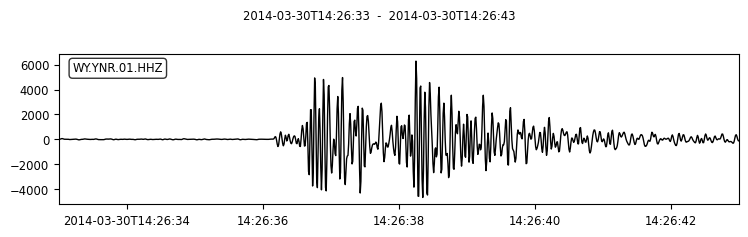

In [8]:
ev394.plot();

In [9]:
auto_df[auto_df['evid'] == 90000658]

,event_number,network,station,channel,location_code,phase,arrival_time,arrival_time_epoch,static_correction,first_motion,residual,take_off_angle,event_latitude,event_longitude,event_depth,origin_time,origin_time_epoch,azimuthal_gap,rms,evid
12857,821,PB,B950,EHZ,1,P,2014-04-01T02:28:33.680000,1.396319e+09,0.0,0,-0.22,114.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12858,821,WY,YNR,HHZ,1,P,2014-04-01T02:28:33.780000,1.396319e+09,0.0,0,-0.04,115.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12859,821,WY,YNM,HHZ,1,P,2014-04-01T02:28:34.040000,1.396319e+09,0.0,0,0.32,116.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12860,821,PB,B950,EHN,1,S,2014-04-01T02:28:34.710000,1.396319e+09,0.0,0,-0.21,114.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12861,821,WY,YNR,HHN,1,S,2014-04-01T02:28:34.820000,1.396319e+09,0.0,0,0.03,115.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12862,821,PB,B206,EHZ,1,P,2014-04-01T02:28:35.500000,1.396319e+09,0.0,0,-0.06,32.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12863,821,WY,YUF,HHZ,1,P,2014-04-01T02:28:35.720000,1.396319e+09,0.0,0,0.11,32.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12864,821,WY,YHH,HHZ,1,P,2014-04-01T02:28:36.060000,1.396319e+09,0.0,1,-0.06,32.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12865,821,PB,B206,EHN,1,S,2014-04-01T02:28:37.310000,1.396319e+09,0.0,0,-0.16,36.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658
12866,821,WY,YUF,HHN,1,S,2014-04-01T02:28:37.420000,1.396319e+09,0.0,0,-0.12,36.0,44.768667,-110.6585,0.7,2014-04-01T02:28:31.340000,1.396319e+09,196.0,0.14,90000658


In [10]:
auto_df[auto_df['evid'] == 90000657]

,event_number,network,station,channel,location_code,phase,arrival_time,arrival_time_epoch,static_correction,first_motion,residual,take_off_angle,event_latitude,event_longitude,event_depth,origin_time,origin_time_epoch,azimuthal_gap,rms,evid
12889,820,PB,B950,EHZ,1,P,2014-04-01T02:28:47.140000,1.396319e+09,0.0,1,-0.04,109.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12890,820,WY,YNR,HHZ,1,P,2014-04-01T02:28:47.150000,1.396319e+09,0.0,1,0.01,111.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12891,820,WY,YNM,HHZ,1,P,2014-04-01T02:28:47.170000,1.396319e+09,0.0,1,0.08,112.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12892,820,PB,B950,EHN,1,S,2014-04-01T02:28:47.790000,1.396319e+09,0.0,0,-0.39,111.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12893,820,WY,YNM,HHN,1,S,2014-04-01T02:28:47.840000,1.396319e+09,0.0,0,-0.23,114.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12894,820,WY,YNR,HHN,1,S,2014-04-01T02:28:47.860000,1.396319e+09,0.0,0,-0.25,113.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12895,820,PB,B206,EHZ,1,P,2014-04-01T02:28:48.630000,1.396319e+09,0.0,0,0.00,95.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12896,820,WY,YHH,HHZ,1,P,2014-04-01T02:28:49.070000,1.396319e+09,0.0,0,-0.13,94.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12897,820,PB,B206,EHN,1,S,2014-04-01T02:28:50.360000,1.396319e+09,0.0,0,-0.04,95.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657
12898,820,WY,YUF,HHN,1,S,2014-04-01T02:28:50.490000,1.396319e+09,0.0,0,0.04,95.0,44.758,-110.662667,2.95,2014-04-01T02:28:44.840000,1.396319e+09,113.0,0.12,90000657


In [11]:
yhh =  obspy.read("../../../data/WY.YHH.01.HHZ__20140401T000000Z__20140402T000000Z.mseed")
yhh = obspy_preproc(yhh)

In [12]:
yhh658 = yhh.copy()
yhh658 = yhh658.trim(UTC('2014-04-01T02:28:30'), UTC('2014-04-01T02:28:59'))

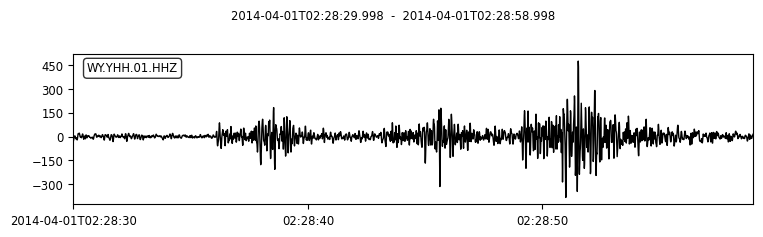

In [13]:
yhh658.plot();

In [14]:
np.diff(auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")].arrival_time_epoch.values)

array([3.28999996])

In [15]:
auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")]

,event_number,network,station,channel,location_code,phase,arrival_time,arrival_time_epoch,static_correction,first_motion,residual,take_off_angle,event_latitude,event_longitude,event_depth,origin_time,origin_time_epoch,azimuthal_gap,rms,evid
4805,339,WY,YMR,HHZ,1,P,2014-03-30T12:43:44.490000,1.396183e+09,0.0,0,0.13,90.0,44.772333,-110.69,2.17,2014-03-30T12:43:38.370000,1.396183e+09,194.0,0.13,90000290
4808,339,WY,YMR,HHN,1,S,2014-03-30T12:43:47.780000,1.396183e+09,0.0,0,0.47,90.0,44.772333,-110.69,2.17,2014-03-30T12:43:38.370000,1.396183e+09,194.0,0.13,90000290


In [34]:
ymr =  obspy.read("../../../data/WY.YMR.01.HHZ__20140330T000000Z__20140331T000000Z.mseed")
ymr = obspy_preproc(ymr)

In [17]:
ymr_N =  obspy.read("../../../data/WY.YMR.01.HHN__20140330T000000Z__20140331T000000Z.mseed")
ymr_N = obspy_preproc(ymr_N)

In [18]:
ymr290 = ymr.copy()
ymr290 = ymr290.trim(UTC('2014-03-30T12:43:33'), UTC('2014-03-30T12:43:59'))

In [19]:
ymr290_N = ymr_N.copy()
ymr290_N = ymr290_N.trim(UTC('2014-03-30T12:43:33'), UTC('2014-03-30T12:43:59'))

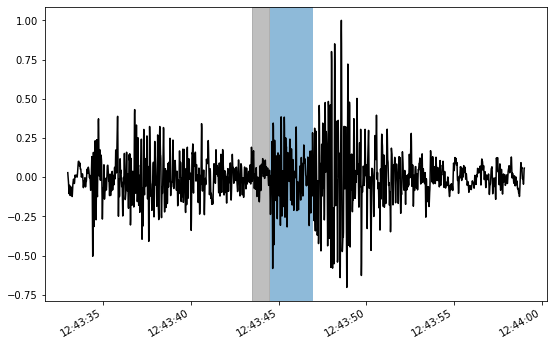

In [20]:
pick_df = auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")]
fig, ax = plt.subplots(1, figsize=(9, 6))
ax.plot(ymr290[0].times('matplotlib'), ymr290[0].data/np.max(abs(ymr290[0].data)), color='k')
# P signal
p_start = UTC(pick_df[pick_df['phase']=="P"]['arrival_time_epoch'])
p_end = p_start + 2.5
ax.axvspan(p_start.matplotlib_date, p_end.matplotlib_date, alpha=0.5)
n_end = p_start - 0.05
n_start = n_end - 0.95
ax.axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray')
ax.xaxis_date()
fig.autofmt_xdate()

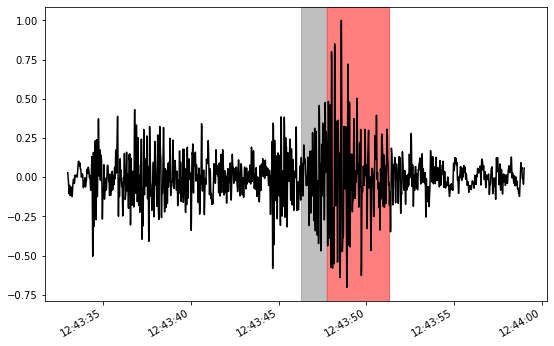

In [21]:
pick_df = auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")]
fig, ax = plt.subplots(1, figsize=(9, 6))
ax.plot(ymr290[0].times('matplotlib'), ymr290[0].data/np.max(abs(ymr290[0].data)), color='k')
# P signal
s_start = UTC(pick_df[pick_df['phase']=="S"]['arrival_time_epoch'])
s_end = s_start + 3.5
ax.axvspan(s_start.matplotlib_date, s_end.matplotlib_date, alpha=0.5, color='r')
n_end = s_start - 0.1
n_start = n_end - 1.4
ax.axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray')
ax.xaxis_date()
fig.autofmt_xdate()

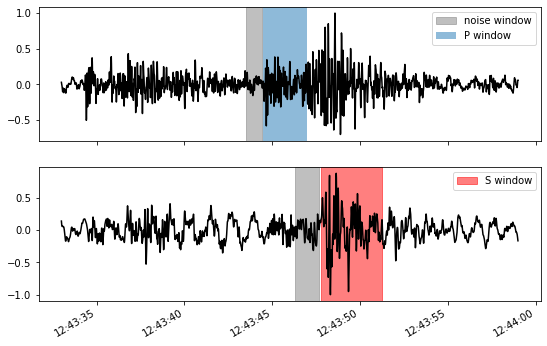

In [22]:
pick_df = auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")]
fig, ax = plt.subplots(2, figsize=(9, 6))

# P plots
ax[0].plot(ymr290[0].times('matplotlib'), ymr290[0].data/np.max(abs(ymr290[0].data)), color='k')

n_end = p_start - 0.05
n_start = n_end - 0.95
ax[0].axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray', label="noise window")

p_start = UTC(pick_df[pick_df['phase']=="P"]['arrival_time_epoch'])
p_end = p_start + 2.5
ax[0].axvspan(p_start.matplotlib_date, p_end.matplotlib_date, alpha=0.5, label="P window")

# S plots
ax[1].plot(ymr290_N[0].times('matplotlib'), ymr290_N[0].data/np.max(abs(ymr290_N[0].data)), color='k')
s_start = UTC(pick_df[pick_df['phase']=="S"]['arrival_time_epoch'])
s_end = s_start + 3.5
ax[1].axvspan(s_start.matplotlib_date, s_end.matplotlib_date, alpha=0.5, color='r', label="S window")
n_end = s_start - 0.1
n_start = n_end - 1.4
ax[1].axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray')

ax[0].xaxis_date()
ax[1].xaxis_date()
ax[0].legend()
ax[1].legend()

fig.autofmt_xdate()
fig.savefig("figures/feature_window_ex.png", dpi=300, bbox_inches='tight')

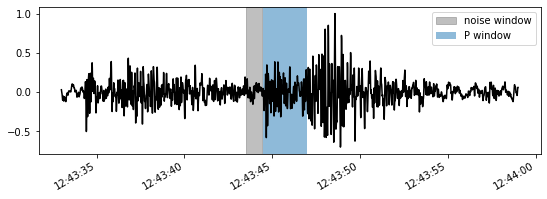

In [23]:
pick_df = auto_df[(auto_df['evid'] == 90000290) & (auto_df['station'] == "YMR")]
fig, ax = plt.subplots(1, figsize=(9, 3))

# P plots
ax.plot(ymr290[0].times('matplotlib'), ymr290[0].data/np.max(abs(ymr290[0].data)), color='k')

n_end = p_start - 0.05
n_start = n_end - 0.95
ax.axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray', label="noise window")

p_start = UTC(pick_df[pick_df['phase']=="P"]['arrival_time_epoch'])
p_end = p_start + 2.5
ax.axvspan(p_start.matplotlib_date, p_end.matplotlib_date, alpha=0.5, label="P window")

ax.xaxis_date()
ax.legend()

fig.autofmt_xdate()
fig.savefig("figures/feature_window_ex_P.png", dpi=300, bbox_inches='tight')

In [24]:
ymr290 = ymr.copy()
ymr290 = ymr290.trim(UTC('2014-03-30T12:43:33'), UTC('2014-03-30T12:44:30'))

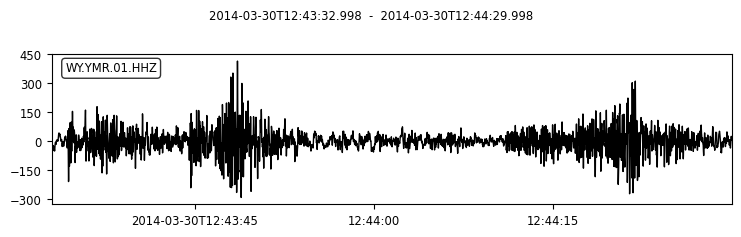

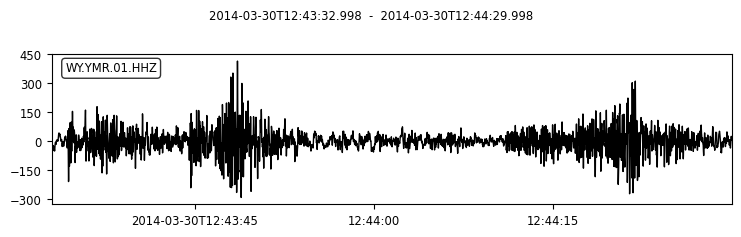

In [25]:
ymr290.plot()

In [28]:
auto_df[auto_df['evid'] == 90000459]

,event_number,network,station,channel,location_code,phase,arrival_time,arrival_time_epoch,static_correction,first_motion,residual,take_off_angle,event_latitude,event_longitude,event_depth,origin_time,origin_time_epoch,azimuthal_gap,rms,evid
8850,571,PB,B950,EHZ,1,P,2014-03-30T15:38:34.780000,1.396194e+09,0.0,0,0.01,91.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8851,571,WY,YNR,HHZ,1,P,2014-03-30T15:38:34.790000,1.396194e+09,0.0,0,0.07,92.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8852,571,WY,YNM,HHN,1,S,2014-03-30T15:38:35.060000,1.396194e+09,0.0,0,-0.51,93.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8853,571,PB,B945,EHZ,1,P,2014-03-30T15:38:35.390000,1.396194e+09,0.0,0,-0.07,91.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8854,571,WY,YHH,HHZ,1,P,2014-03-30T15:38:35.560000,1.396194e+09,0.0,0,0.06,91.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8855,571,PB,B950,EHN,1,S,2014-03-30T15:38:35.630000,1.396194e+09,0.0,0,-0.45,92.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8856,571,WY,YNR,HHN,1,S,2014-03-30T15:38:35.740000,1.396194e+09,0.0,0,-0.26,92.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8857,571,WY,YHH,HHN,1,S,2014-03-30T15:38:37.020000,1.396194e+09,0.0,0,-0.16,91.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8858,571,PB,B945,EHN,1,S,2014-03-30T15:38:37.220000,1.396194e+09,0.0,0,0.07,91.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459
8859,571,WY,YMR,HHZ,1,P,2014-03-30T15:38:37.780000,1.396194e+09,0.0,0,-0.03,90.0,44.7875,-110.702333,2.2,2014-03-30T15:38:31.820000,1.396194e+09,182.0,0.1,90000459


In [33]:
np.diff(auto_df[(auto_df['evid'] == 90000458) & (auto_df['station'] == "YMR")].arrival_time_epoch.values)

array([3.57999992])

In [39]:
ymr458 = ymr.copy()
ymr458 = ymr458.trim(UTC('2014-03-30T15:38:30'), UTC('2014-03-30T15:38:50'))

ymr458_N = ymr.copy()
ymr458_N = ymr458_N.trim(UTC('2014-03-30T15:38:30'), UTC('2014-03-30T15:38:50'))

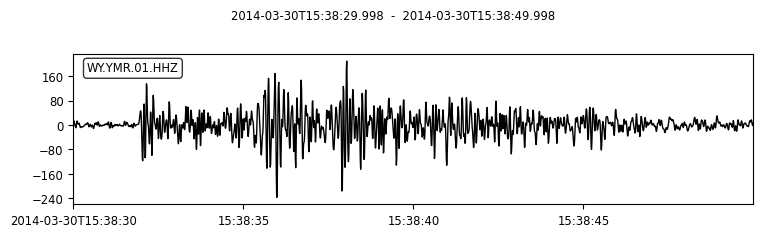

In [38]:
ymr458.plot();

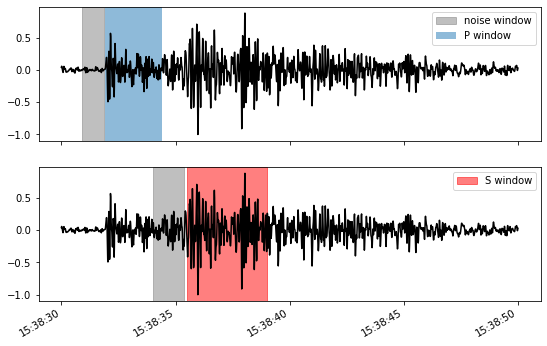

In [46]:
pick_df = auto_df[(auto_df['evid'] == 90000458) & (auto_df['station'] == "YMR")]
fig, ax = plt.subplots(2, figsize=(9, 6))

# P plots
ax[0].plot(ymr458[0].times('matplotlib'), ymr458[0].data/np.max(abs(ymr458[0].data)), color='k')

p_start = UTC(pick_df[pick_df['phase']=="P"]['arrival_time_epoch'])
p_end = p_start + 2.5
n_end = p_start - 0.05
n_start = n_end - 0.95

ax[0].axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray', label="noise window")

ax[0].axvspan(p_start.matplotlib_date, p_end.matplotlib_date, alpha=0.5, label="P window")

# S plots
ax[1].plot(ymr458_N[0].times('matplotlib'), ymr458_N[0].data/np.max(abs(ymr458_N[0].data)), color='k')
s_start = UTC(pick_df[pick_df['phase']=="S"]['arrival_time_epoch'])
s_end = s_start + 3.5
ax[1].axvspan(s_start.matplotlib_date, s_end.matplotlib_date, alpha=0.5, color='r', label="S window")
n_end = s_start - 0.1
n_start = n_end - 1.4
ax[1].axvspan(n_start.matplotlib_date, n_end.matplotlib_date, alpha=0.5, color='gray')

ax[0].xaxis_date()
ax[1].xaxis_date()
ax[0].legend()
ax[1].legend()

fig.autofmt_xdate()
fig.savefig("figures/feature_window_2_S.png", dpi=300, bbox_inches='tight')